# HW: Satellite NPP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### use xarray library to read in the netCDF file

In [11]:
# Behrenfeld and Falkowski (1997)
ds=xr.open_dataset('NPP_VGPM_MODISR18_3x3_2003_2018.nc')
# ds is the data object, 'ds' shows its data name and attributes

### (1) Contrast the northern and southern high latitude productivity. Perform zonal (longitudinal) mean at 50°N and 50°S and plot the time series together. 

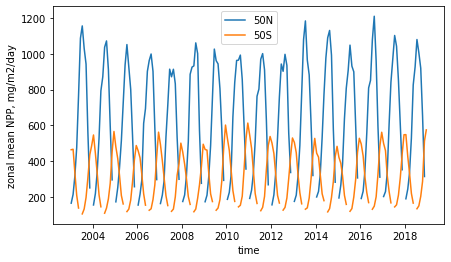

In [9]:
NPP_xmean=ds.NPP.mean(dim='lon')
plt.figure(figsize=(7,4))
plt.plot(ds.time,NPP_xmean.sel(lat=50,method='nearest'),label='50N')
plt.plot(ds.time,NPP_xmean.sel(lat=-50,method='nearest'),label='50S')
plt.legend()
plt.xlabel('time')
plt.ylabel('zonal mean NPP, mg/m2/day')
plt.show()

### NPP is generally low in the Southern Ocean (50S) relative to the North Atlantic (50N) at similar latitudes. 

### (2) Extract a NPP time series in the eastern tropical Pacific (e.g. 90°W at equator) and plot a time series. Examine the NPP in the 2015-16 El-Nino event 

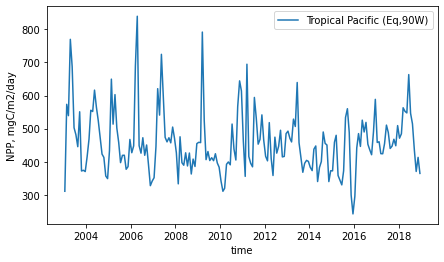

In [13]:
plt.figure(figsize=(7,4))

# North Atlantic, 40N, 50W
NPP_EQP=ds.NPP.sel(lat=0,lon=-90,method="nearest")
plt.plot(ds.time,NPP_EQP,label='Tropical Pacific (Eq,90W)')
plt.legend()
plt.ylabel('NPP, mgC/m2/day')
plt.xlabel('time')
plt.show()

### The winter of 2015/16, the NPP value is at the lowest level in the observation period. 

### (3) We would like to evaluate how different NPP was during 2015/16 event. Calculate the departure of NPP from its climatological means for the December of 2015 and generate a global map. 

In [16]:
# calculate December average (from all years)
NPP_dec = ds.NPP.sel(time=ds['time.month']==12).mean(dim='time')
NPP_dec15=ds.NPP.sel(time="2015-12")
deltaNPP=NPP_dec15-NPP_dec

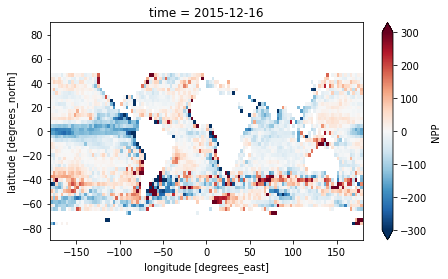

In [20]:
# generate a global map
plt.figure(figsize=(7,4))
deltaNPP.plot(vmin=-300,vmax=300,cmap='RdBu_r')
plt.show()

### There is a belt of low NPP along the equatorial Pacific under El Nino condition, likely due to the weakened equatorial upwelling and diminished supply of nutrients to the surface waters